In [4]:
import pandas as pd 
import numpy as np
import re

In [5]:
df = pd.read_csv('All_cities.csv', low_memory=False)

In [6]:

# Function to clean numeric columns
def clean_numeric_column(column):
    # Remove non-numerical characters except for decimal points
    column_cleaned = column.astype(str).str.replace(r'[^\d.]', '', regex=True)
    # Convert to numeric, setting errors='coerce' to handle conversion issues
    return pd.to_numeric(column_cleaned, errors='coerce')

# Function to extract numeric values from a string
def extract_numeric(value_str):
    if isinstance(value_str, str):
        match = re.search(r'(\d+(\.\d+)?)', value_str)
        return float(match.group(1)) if match else None
    return None

# Apply cleaning functions to the DataFrame
df['Price'] = clean_numeric_column(df['Price'])
df['Kms Driven'] = clean_numeric_column(df['Kms Driven'])
df['Engine Displacement'] = clean_numeric_column(df['Engine Displacement'])
df['Mileage'] = df['Mileage'].apply(lambda x: extract_numeric(x))
df['Max Power'] = df['Max Power'].apply(lambda x: extract_numeric(x))
df['Torque'] = df['Torque'].apply(lambda x: extract_numeric(x))
df['Length'] = clean_numeric_column(df['Length'])
df['Width'] = clean_numeric_column(df['Width'])
df['Height'] = clean_numeric_column(df['Height'])
df['Wheel Base'] = clean_numeric_column(df['Wheel Base'])
df['Kerb Weight'] = clean_numeric_column(df['Kerb Weight'])
df['Ground Clearance Unladen'] = clean_numeric_column(df['Ground Clearance Unladen'])


In [9]:
print(df['Registration Year'].head(20))


0       2015
1     Feb-18
2     Sep-18
3     Dec-14
4       2015
5       2020
6     Aug-17
7       2021
8     Aug-18
9     Jan-18
10      2018
11    May-19
12    Oct-18
13    Aug-18
14    Aug-14
15      2018
16    Jun-22
17    May-14
18      2022
19    Sep-16
Name: Registration Year, dtype: object


In [ ]:
# Descriptive statistics
mean = df.mean()
median = df.median()
mode = df.mode().iloc[0]  # mode() returns a DataFrame, so we use iloc[0] to get the first mode
std_dev = df.std()

print("Mean:\n", mean)
print("\nMedian:\n", median)
print("\nMode:\n", mode)
print("\nStandard Deviation:\n", std_dev)


In [19]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])


In [20]:
# Check the data types of all columns
print(df.dtypes)


Body Type                           object
Owner                               object
Original Equipment Manufacturer     object
Model                               object
Model Year                         float64
Price                                int64
Registration Year                   object
Fuel Type                           object
Seats                               object
Kms Driven                           int64
RTO                                 object
Engine Displacement                  int64
Transmission                        object
Year of Manufacture                float64
Mileage                            float64
Max Power                          float64
Torque                             float64
Color                               object
Engine Type                         object
Length                               int64
Width                                int64
Height                               int64
Wheel Base                           int64
Kerb Weight

In [22]:
# Convert 'price' to numeric, forcing errors to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [26]:
# Check for missing values in 'price'
print(df['Price'].isna().sum())


0


In [27]:
# Recheck numeric columns
numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.columns)


Index(['Model Year', 'Price', 'Kms Driven', 'Engine Displacement',
       'Year of Manufacture', 'Mileage', 'Max Power', 'Torque', 'Length',
       'Width', 'Height', 'Wheel Base', 'Kerb Weight', 'Seating Capacity',
       'Ground Clearance Unladen'],
      dtype='object')


In [23]:
# List of columns to exclude (if known)
exclude_columns = ['Body Type', 'Owner', 'Original Equipment Manufacturer', 
                   'Model', 'Registration Year',  'Fuel Type', 'Seats', 
                   'RTO', 'Transmission', 'Color', 'Engine Type', 'City']

# Select numeric columns excluding specific ones
numeric_df = df.drop(columns=exclude_columns).select_dtypes(include=['number'])


In [28]:
# Calculate the correlation matrix
correlation = numeric_df.corr()

# Calculate correlation with target
if 'Price' in correlation.columns:
    correlation_with_target = correlation['Price'].sort_values(ascending=False)
    print("Correlation with target:\n", correlation_with_target)
else:
    print("Target column 'Price' is still not found in numeric data.")



Correlation with target:
 Price                       1.000000
Max Power                   0.749159
Torque                      0.654294
Width                       0.572498
Wheel Base                  0.566490
Engine Displacement         0.563697
Length                      0.523121
Year of Manufacture         0.295623
Model Year                  0.292765
Seating Capacity            0.081899
Height                      0.003627
Ground Clearance Unladen   -0.043211
Kerb Weight                -0.057842
Kms Driven                 -0.191781
Mileage                    -0.239964
Name: Price, dtype: float64


In [29]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

# Prepare feature matrix X and target vector y
X = numeric_df.drop(columns=['Price'])  # Exclude the target column from features
y = numeric_df['Price']

# Initialize and fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature importances:\n", feature_importances)


Feature importances:
 Max Power                   0.685946
Height                      0.069759
Model Year                  0.063609
Torque                      0.038548
Year of Manufacture         0.036980
Kerb Weight                 0.025578
Width                       0.016540
Wheel Base                  0.016375
Kms Driven                  0.014387
Length                      0.013071
Mileage                     0.009396
Engine Displacement         0.008224
Seating Capacity            0.001308
Ground Clearance Unladen    0.000279
dtype: float64


In [30]:
categorical_summary = df.select_dtypes(include=['object']).describe()
print("Categorical Summary:\n", categorical_summary)


Categorical Summary:
         Body Type      Owner Original Equipment Manufacturer       Model  \
count      552269     552269                          552269      552269   
unique         10          6                              33         315   
top     Hatchback  1st Owner                          Maruti  Honda City   
freq       547471     549782                          546152      544270   

       Registration Year Fuel Type    Seats     RTO Transmission   Color  \
count             552269    552269   552269  552269       552269  552269   
unique               233         5        8     464            2     153   
top                 2022    Petrol  5 Seats    WB02       Manual  Others   
freq              544177    549454   551260  545246       549952  546071   

           Engine Type    City  
count           552269  552269  
unique             508       6  
top     In-Line Engine   Delhi  
freq            544679  104775  


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


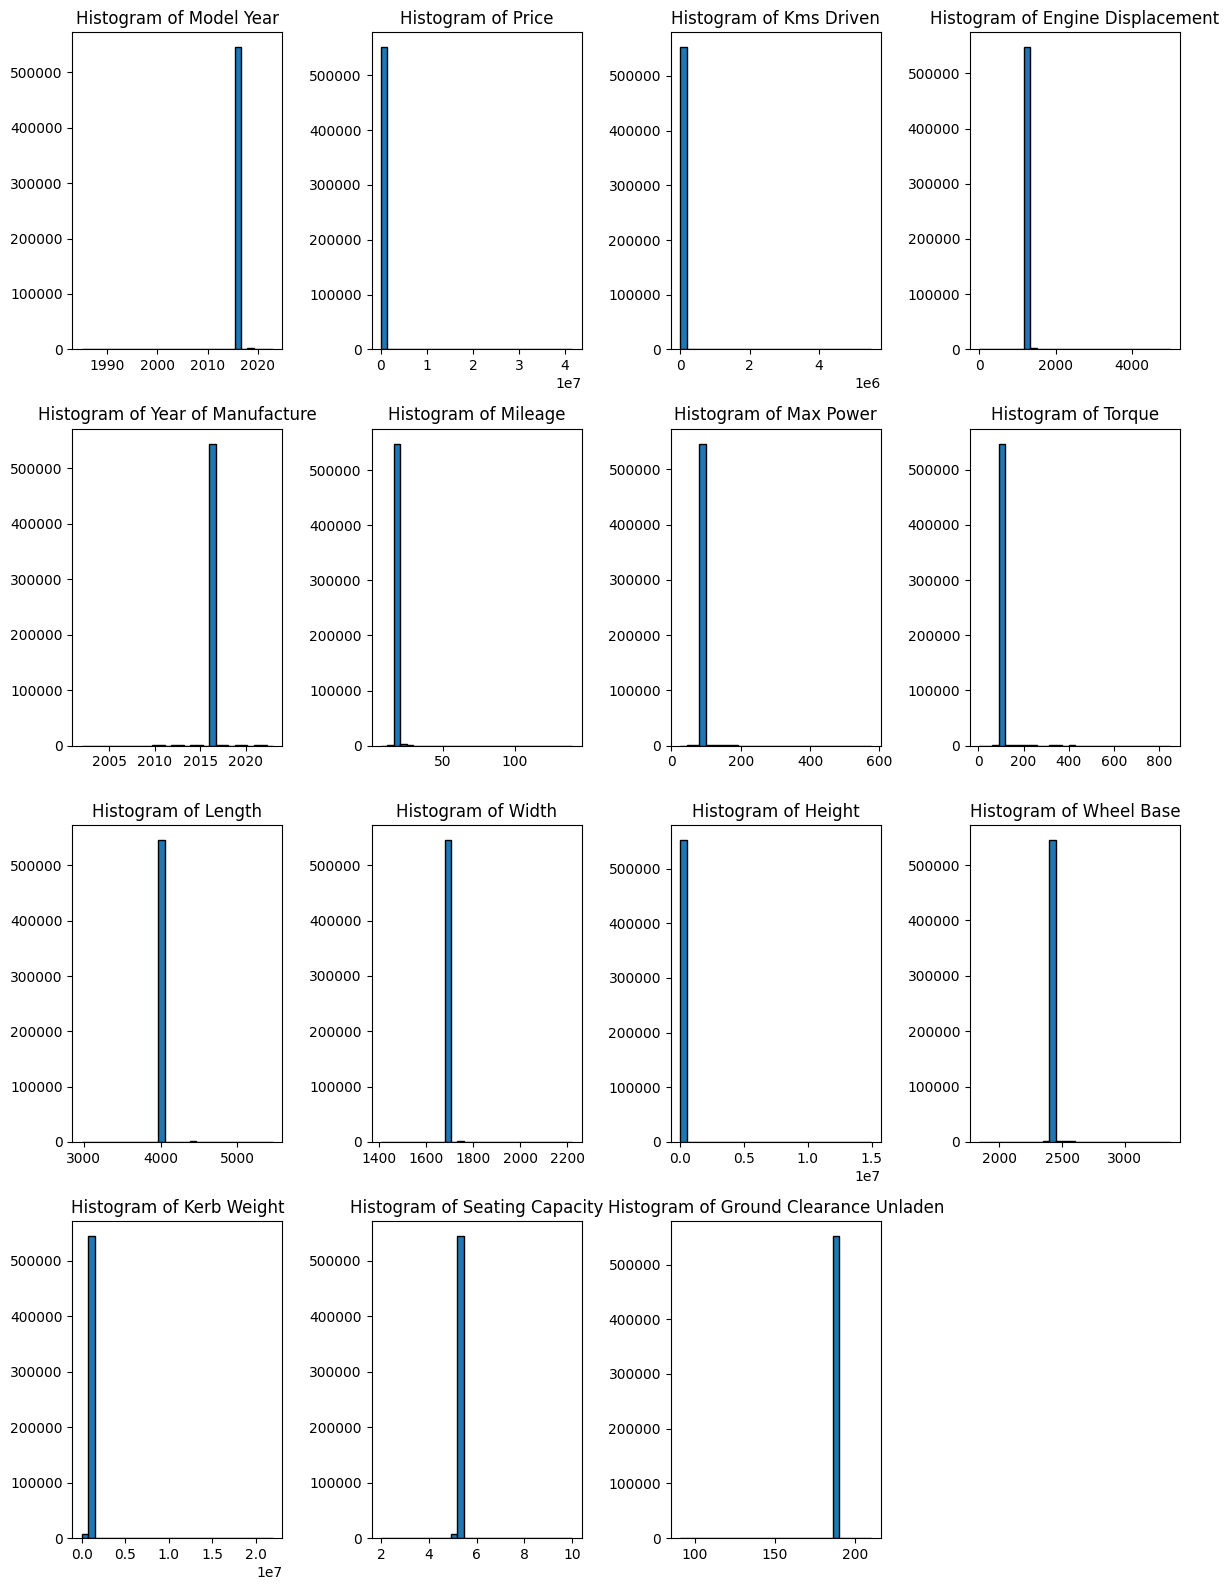

In [34]:
# Histograms

numeric_columns = df.select_dtypes(include=['number']).columns

num_columns = len(numeric_columns)
num_rows = (num_columns + 3) // 4  # Adjust the number of rows as needed
num_cols = 4

plt.figure(figsize=(12, 4 * num_rows))
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.hist(df[col], bins=30, edgecolor='k')
    plt.title(f'Histogram of {col}')
    plt.tight_layout()

plt.show()


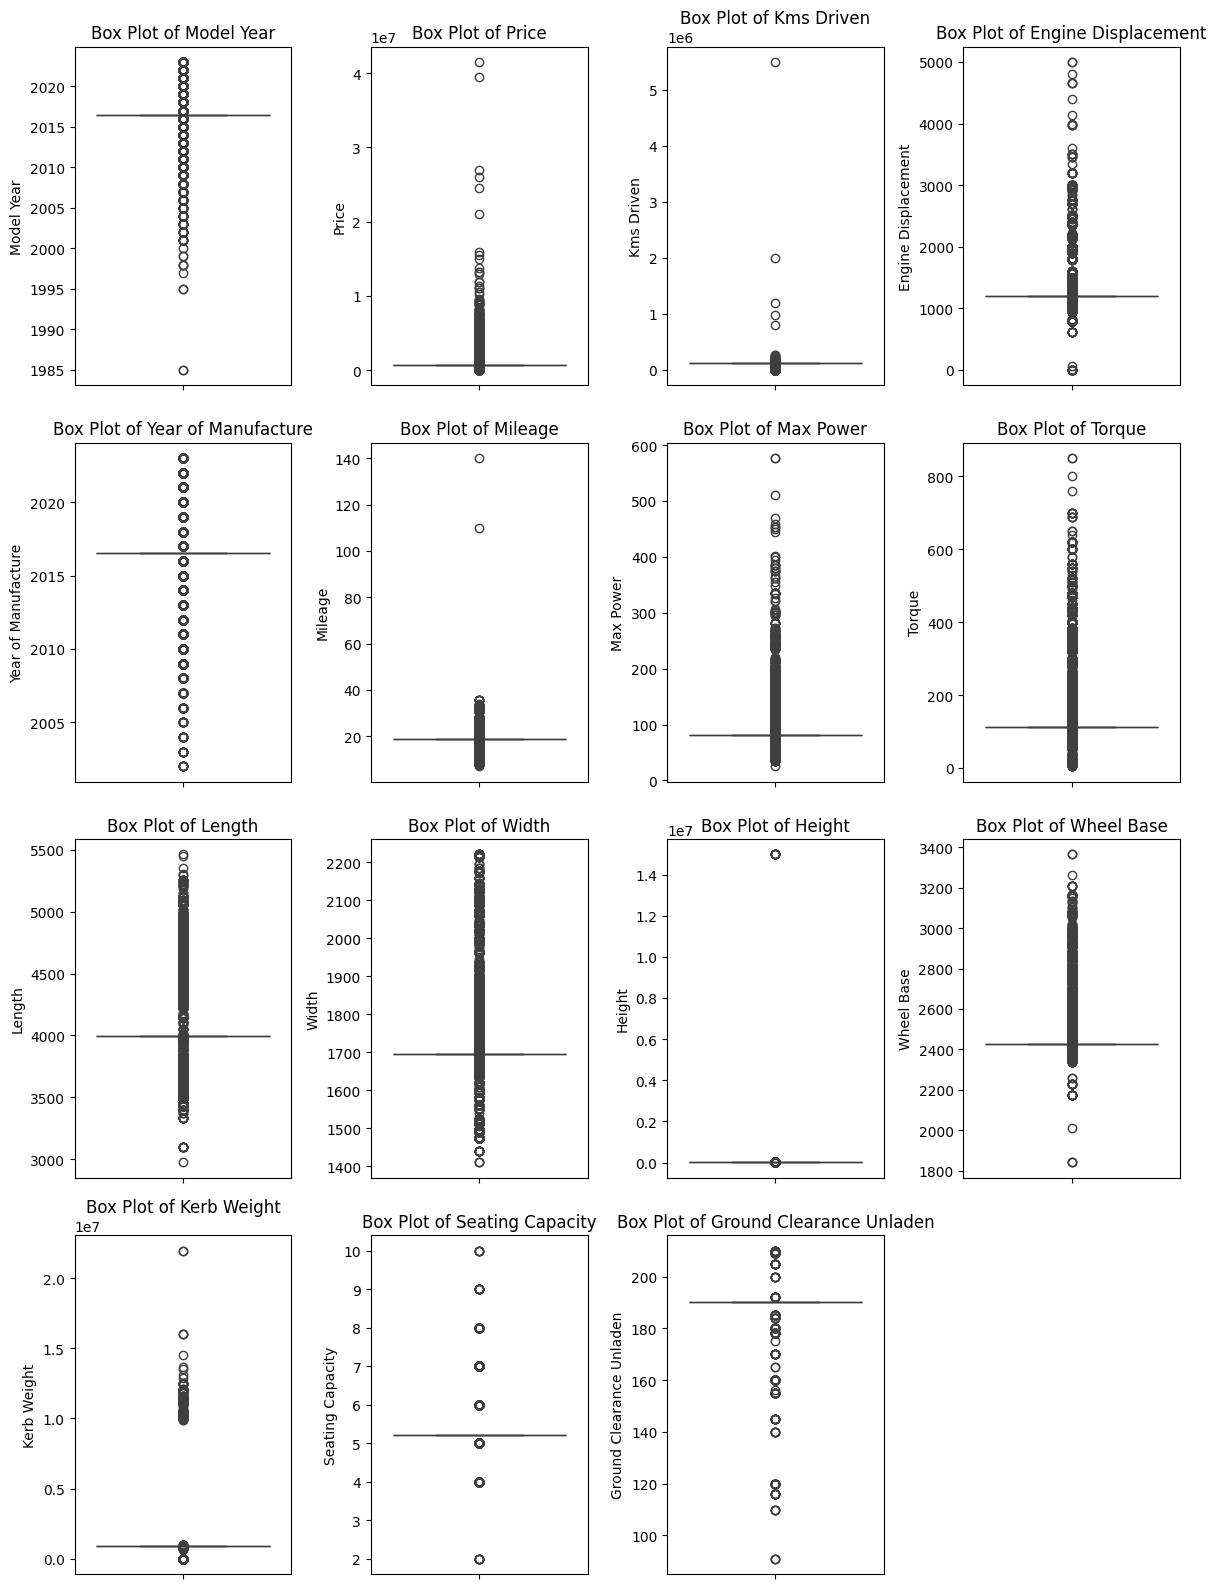

In [36]:
# Box Plots

# Filter only numeric columns for plotting
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns needed
num_cols = 4  # Number of columns in the subplot grid
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols  # Compute number of rows needed

plt.figure(figsize=(12, 4 * num_rows))

for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(df[col].dropna())  # Drop NA values for plotting
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

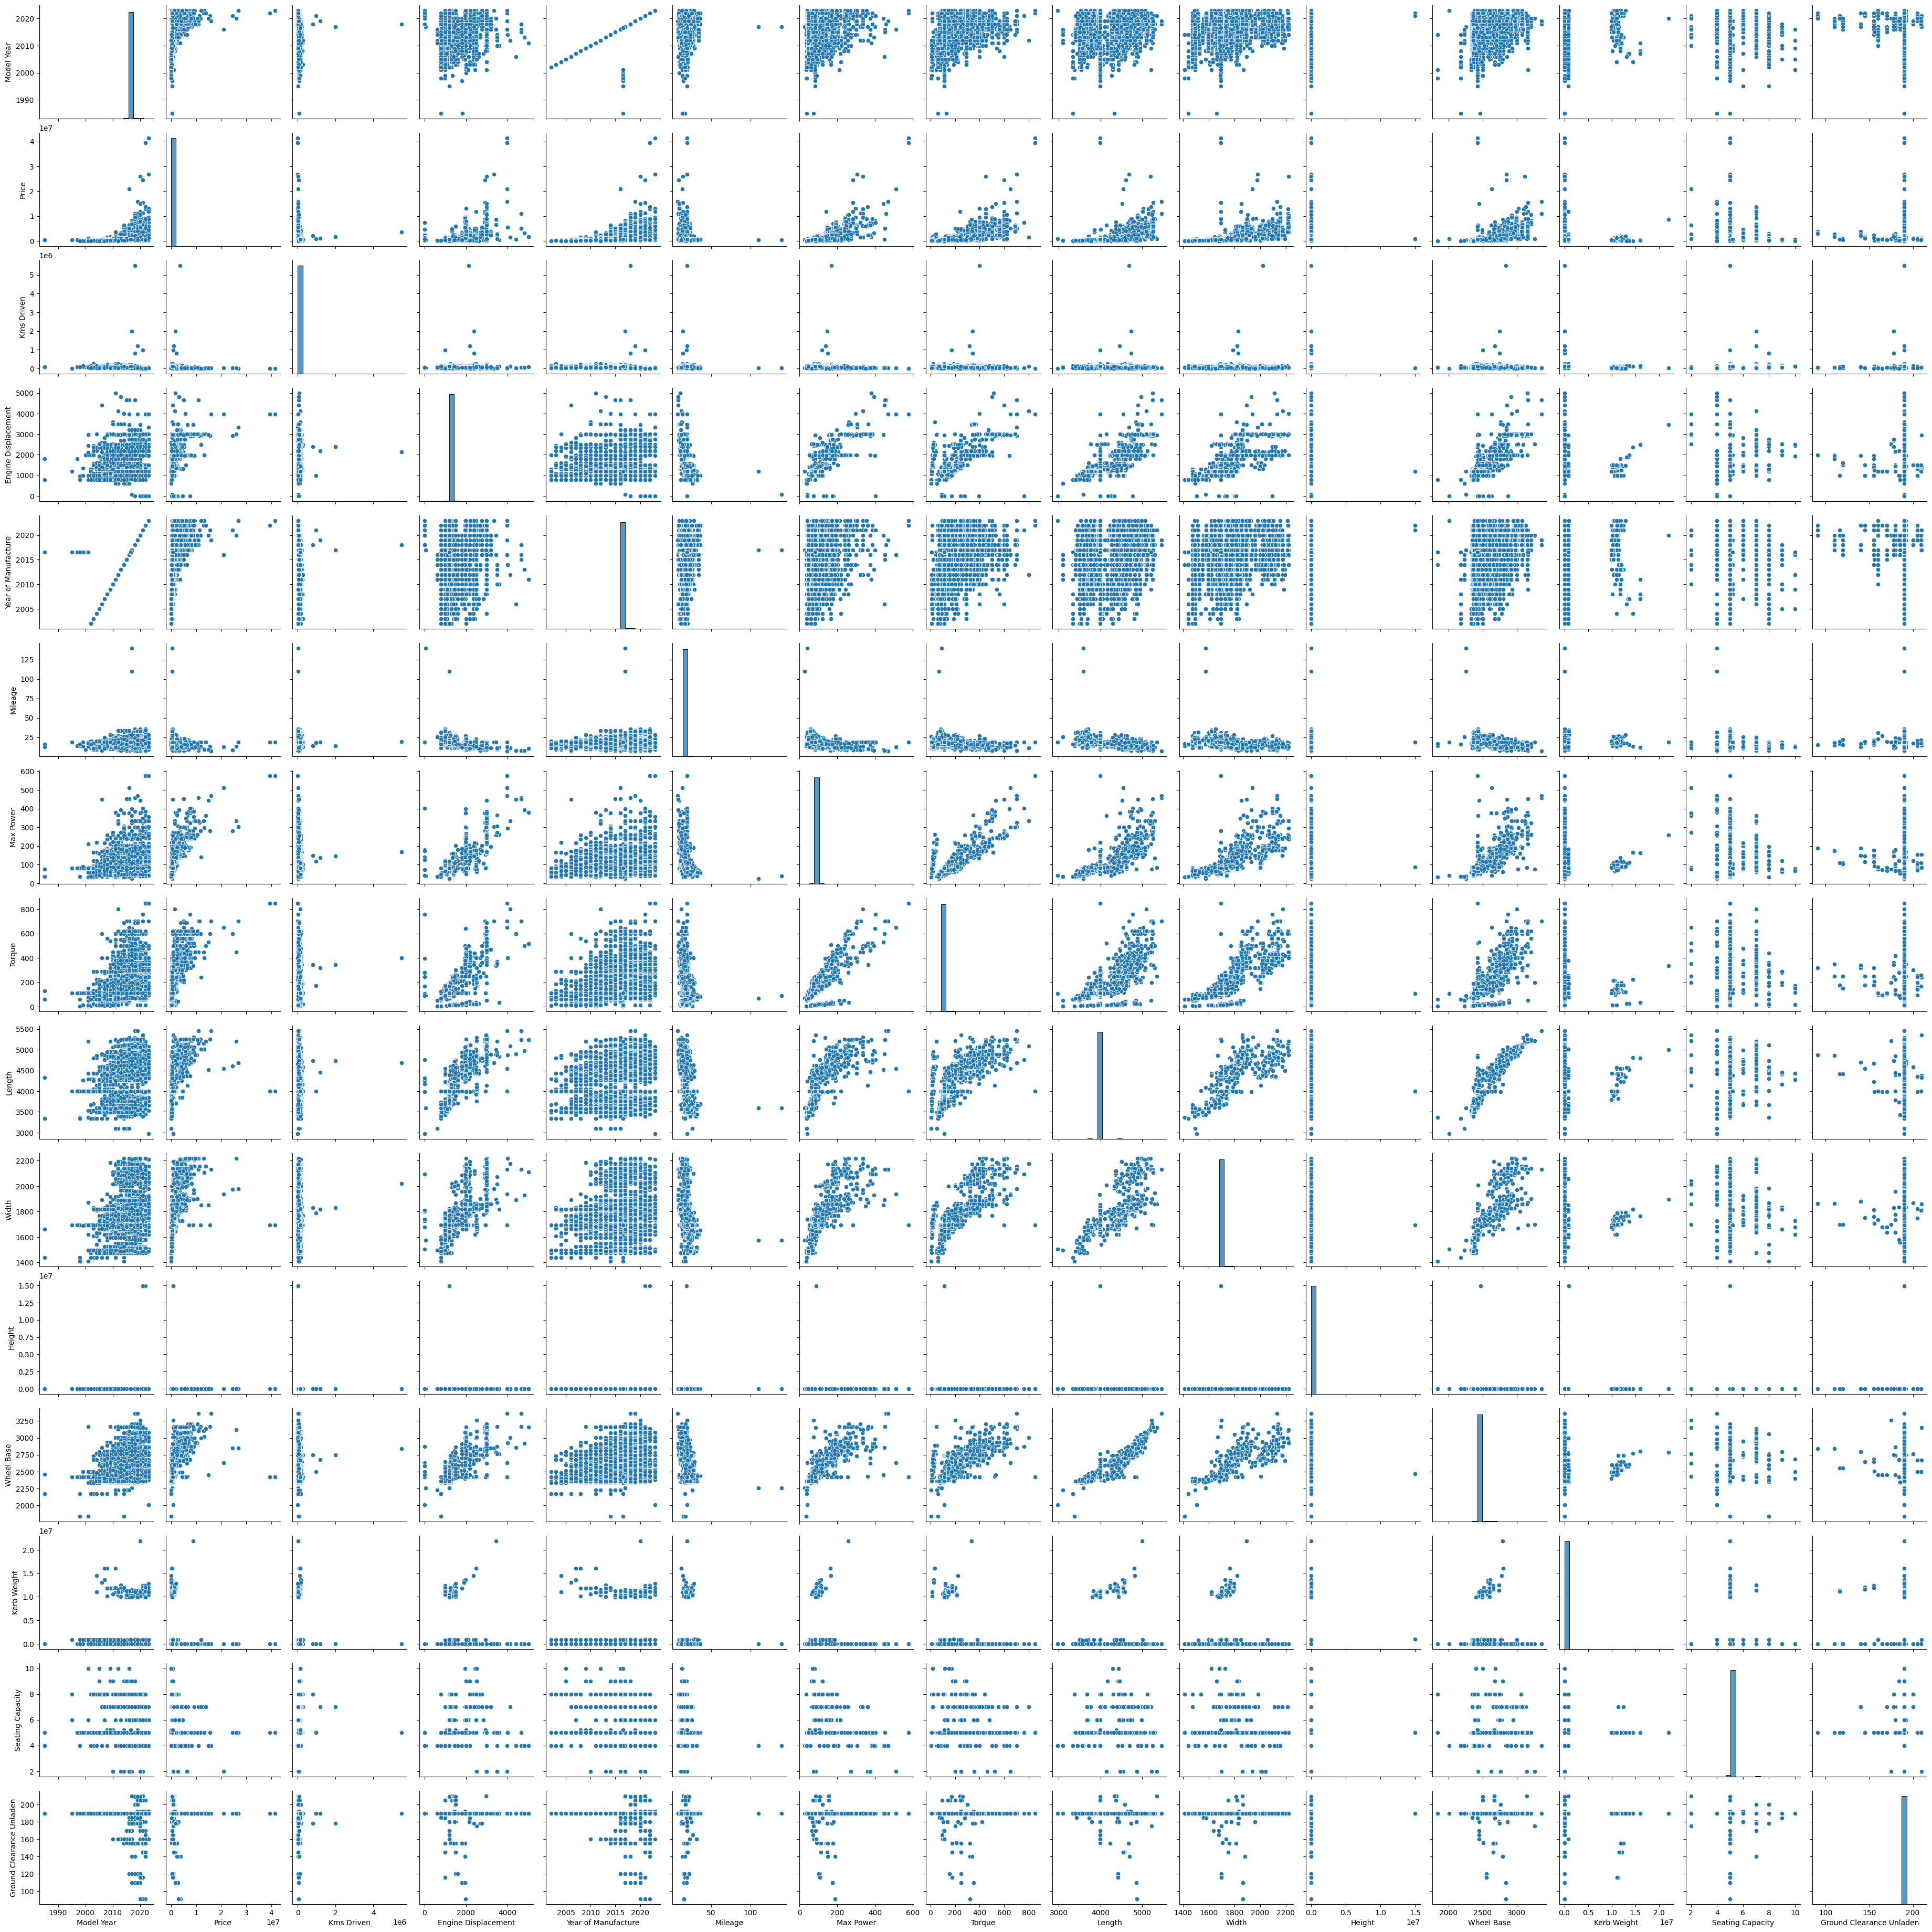

In [37]:
# Scatter Plots

plt.figure(figsize=(12, 8))
sns.pairplot(df)
plt.show()


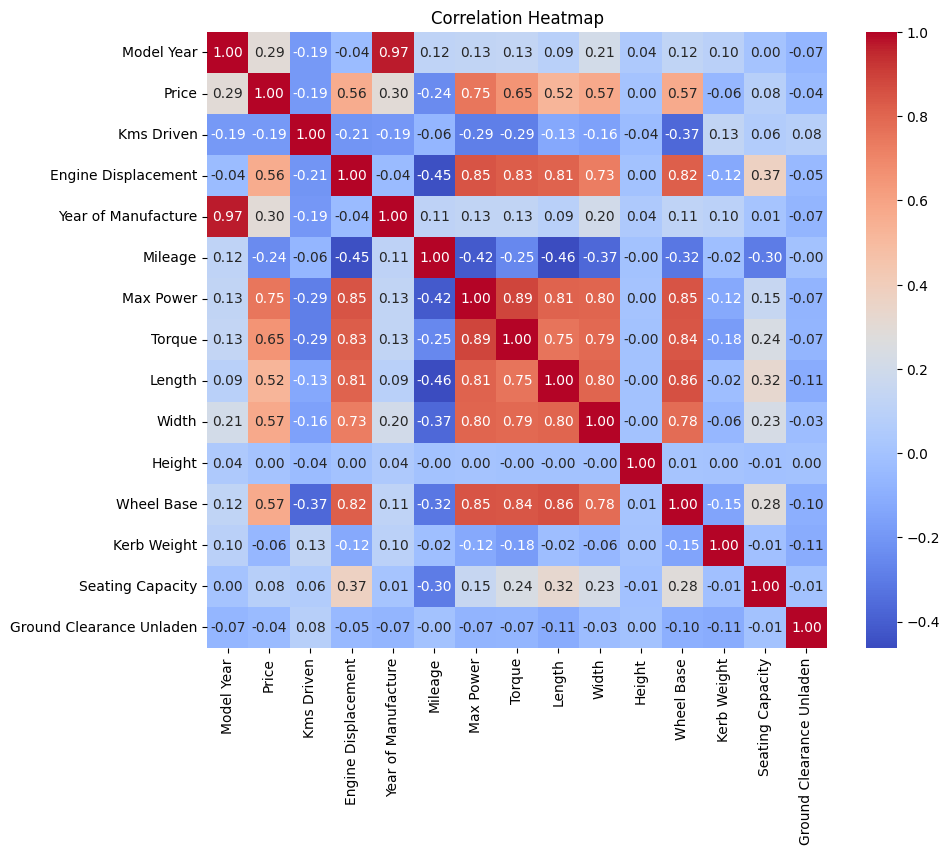

In [39]:
# Heatmap of Correlations

# Only keep numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [41]:
# Save the DataFrame to a CSV file

df.to_csv('All_cities_data.csv', index= False)

In [1]:
print(df['Registration Year'].head())


NameError: name 'df' is not defined